In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [2]:
!kaggle datasets download --force salader/dogs-vs-cats

 99% 1.05G/1.06G [00:07<00:00, 173MB/s]
100% 1.06G/1.06G [00:07<00:00, 161MB/s]


In [3]:
import zipfile
zip_ref = zipfile.ZipFile("/content/dogs-vs-cats.zip", "r")
zip_ref.extractall("/content")
zip_ref.close()

In [4]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Dropout

In [5]:
 #generators - used to process large amount of data
 train_ds = keras.utils.image_dataset_from_directory(
    directory = "/content/dogs_vs_cats/train",
    labels = "inferred",
    label_mode = "int",
    batch_size = 32,
    image_size = (256, 256)
 )

validation_ds = keras.utils.image_dataset_from_directory(
    directory = "/content/dogs_vs_cats/test",
    labels = "inferred",
    label_mode = "int",
    batch_size = 32,
    image_size = (256, 256)
 )

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [6]:
#Normalization
def process (image, label):
  image = tf.cast(image/255, tf.float32)
  return image, label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [7]:
# Create CNN model
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), padding='valid', activation='relu', input_shape=(256, 256, 3)))
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding="valid"))

model.add(Conv2D(32, kernel_size=(3, 3), padding='valid', activation='relu', input_shape=(256, 256, 3)))
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding="valid"))

model.add(Conv2D(32, kernel_size=(3, 3), padding='valid', activation='relu', input_shape=(256, 256, 3)))
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding="valid"))

model.add(Flatten())
model.add(Dense(128, activation="relu"))
model.add(Dense(64, activation="relu"))
model.add(Dense(1, activation="sigmoid"))


In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 32)       0

In [9]:
model.compile(optimizer="Adam", loss="binary_crossentropy", metrics=["accuracy"])

In [10]:
history = model.fit(train_ds, epochs=5, validation_data=validation_ds)

Epoch 1/5
625/625 [==============================] - 64s 82ms/step - loss: 0.5841 - accuracy: 0.6779 - val_loss: 0.5199 - val_accuracy: 0.7480
Epoch 2/5
625/625 [==============================] - 50s 79ms/step - loss: 0.4625 - accuracy: 0.7786 - val_loss: 0.4752 - val_accuracy: 0.7854
Epoch 3/5
625/625 [==============================] - 53s 85ms/step - loss: 0.3569 - accuracy: 0.8400 - val_loss: 0.4985 - val_accuracy: 0.7984
Epoch 4/5
625/625 [==============================] - 50s 79ms/step - loss: 0.2355 - accuracy: 0.8978 - val_loss: 0.6598 - val_accuracy: 0.7808
Epoch 5/5
625/625 [==============================] - 50s 80ms/step - loss: 0.1405 - accuracy: 0.9469 - val_loss: 0.7847 - val_accuracy: 0.7916


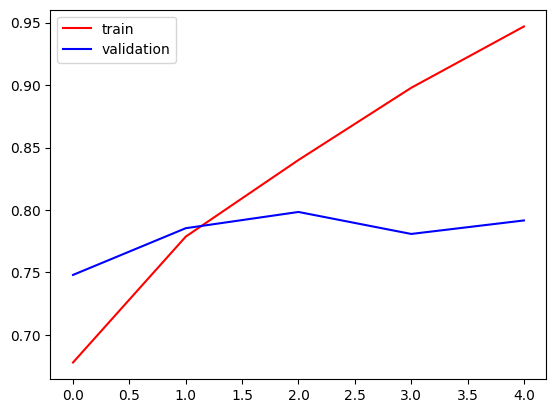

In [11]:
import matplotlib.pyplot as plt

plt.plot(history.history["accuracy"], color="red", label="train")
plt.plot(history.history["val_accuracy"], color="blue", label="validation")
plt.legend()
plt.show()


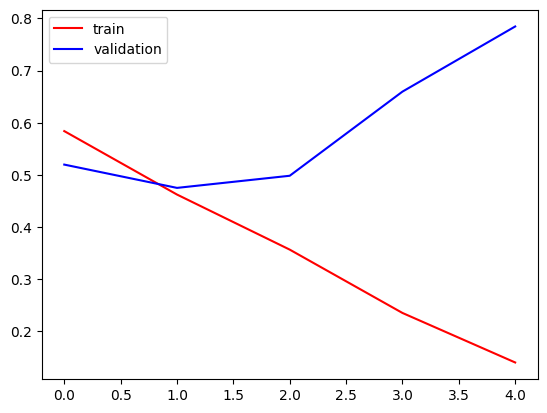

In [12]:
plt.plot(history.history["loss"], color="red", label="train")
plt.plot(history.history["val_loss"], color="blue", label="validation")
plt.legend()
plt.show()

In [13]:
import cv2

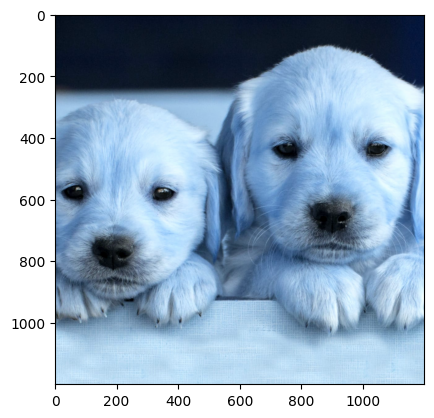

In [21]:
testing_dog = cv2.imread("/content/dog.jpg")
plt.imshow(testing_dog)

In [22]:
testing_dog.shape

(1200, 1200, 3)

In [23]:
testing_dog = cv2.resize(testing, (256, 256))

In [24]:
testing_input = testing_dog.reshape((1, 256, 256, 3))

In [25]:
model.predict(testing_input)

1/1 [==============================] - 0s 41ms/step


array([[1.]], dtype=float32)

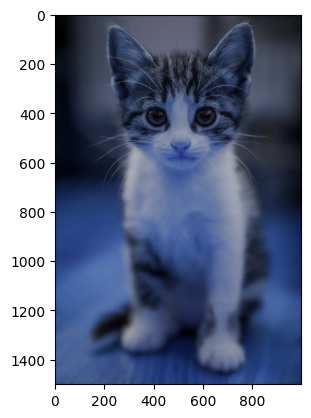

In [31]:
testing_cat = cv2.imread("/content/Cat.jpg")
plt.imshow(testing_cat)

In [32]:
testing_cat.shape

(1500, 1000, 3)

In [33]:
testing_cat = cv2.resize(testing_cat, (256, 256))

In [34]:
testing_input_cat = testing_cat.reshape((1, 256, 256, 3))

In [35]:
model.predict(testing_input_cat)

1/1 [==============================] - 0s 20ms/step


array([[0.]], dtype=float32)